In [1]:
# python
import os
import sys
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

/tmp/ipykernel_7161/1657378464.py:6: DeprecationWarning: NanoEventsFactory.from_root() behavior has changed.
    The default behavior is that now it reads the input root file using
    the newly developed virtual arrays backend of awkward instead of dask.
    The backend choice is controlled by the `mode` argument of the method
    which can be set to "eager", "virtual", or "dask".
    The new default is "virtual" while the `delayed` argument has been removed.
    The old `delayed=True` is now equivalent to `mode="dask"`.
    The old `delayed=False` is now equivalent to `mode="eager"`.
    
  from coffea.nanoevents import NanoAODSchema


In [2]:
channels = [
    "baseNoLjNoLjsource",
    "jake_test_select",
    "baseNoLj",
    "base",
    "2mu2e",
    "4mu",
]

In [3]:
selections_menu = utilities.load_yaml(f"{sidm_path}/sidm/configs/selections.yaml")
for ch in channels:
    print(ch)
    sel = selections_menu[ch]
    print("  obj cuts")
    for obj, cuts in sel["obj_cuts"].items():
        print(f"    {obj}: {cuts}")
    print("  post-LJ obj cuts")
    if "postLj_obj_cuts" in sel:
        for obj, cuts in sel["postLj_obj_cuts"].items():
            print(f"    {obj}: {cuts}")
    else:
        print("    None")
    print("  event cuts")
    if "evt_cuts" in sel:
        print(f"    {sel['evt_cuts']}")
    else:
        print("    None")
    print()

baseNoLjNoLjsource
  obj cuts
    genMus: ['status 1']
    genEs: ['status 1']
  post-LJ obj cuts
    None
  event cuts
    [{'evt_cuts': ['pass triggers']}, ['PV filter']]

jake_test_select
  obj cuts
    electrons: ['dR(e, A) < 0.5', 'looseID']
    muons: ['dR(mu, A) < 0.5', 'looseID']
    dsaMuons: ['dR(mu, A) < 0.5']
  post-LJ obj cuts
    ljs: ['pT > 30 GeV', '|eta| < 2.4', 'mu_charge == 0']
  event cuts
    [[[{'evt_cuts': ['pass triggers']}, ['PV filter']]], '>=2 LJs']

baseNoLj
  obj cuts
    genMus: ['status 1']
    genEs: ['status 1']
    electrons: ['pT > 10 GeV', '|eta| < 2.4', 'MVANonIsoWPL']
    muons: ['looseID', 'pT > 5 GeV', '|eta| < 2.4']
    photons: ['pT > 20 GeV', '|eta| < 2.5', 'Custom Cutbased', 'pixelSeed', 'Photon DR Veto 0p025']
    dsaMuons: ['pT > 10 GeV', '|eta| < 2.4', 'displaced ID', 'dR(dsa, pf) > 0.2']
  post-LJ obj cuts
    None
  event cuts
    [[{'evt_cuts': ['pass triggers']}, ['PV filter']]]

base
  obj cuts
    genMus: ['status 1']
    genEs: ['st

In [4]:
samples = [
    '2Mu2E_500GeV_5p0GeV_0p8mm',
    # '2Mu2E_500GeV_5p0GeV_8p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=NanoAODSchema,
    maxchunks=1,
    skipbadfiles=True
)

p = sidm_processor.SidmProcessor(
    channels,
    ["muon_base", "jake_test_collection"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb


In [5]:
for ch in channels:
    print(ch)
    out[samples[0]]["cutflow"][ch].print_table()
    print()


baseNoLjNoLjsource
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                24.4         24.4
PV filter                    59.8         24.4

jake_test_select
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                24.4         24.4
PV filter                    59.8         24.4
>=2 LJs                      37.4         18.9

baseNoLj
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                24.4         24.4
PV filter                    59.8         24.4

base
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                24.4         24.4
PV filt

In [6]:
for ch in channels:
    print(ch)
    print(out[samples[0]]["hists"])
    print()

baseNoLjNoLjsource
{'muon_n': Hist(
  StrCategory(['baseNoLjNoLjsource', 'jake_test_select', 'baseNoLj', 'base', '2mu2e', '4mu'], name='channel'),
  Regular(10, 0, 10, name='muons_n', label='Number of PF Muons'),
  storage=Weight()) # Sum: WeightedSum(value=109.506, variance=1.51486), 'muon_pt': Hist(
  StrCategory(['baseNoLjNoLjsource', 'jake_test_select', 'baseNoLj', 'base', '2mu2e', '4mu'], name='channel'),
  Regular(100, 0, 500, name='muons_pt', label='PF Muon $p_T$ (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=226.648, variance=3.13535) (WeightedSum(value=226.69, variance=3.13592) with flow), 'muon_dxy': Hist(
  StrCategory(['baseNoLjNoLjsource', 'jake_test_select', 'baseNoLj', 'base', '2mu2e', '4mu'], name='channel'),
  Regular(100, 0, 100, name='muons_dxy', label='PF Muon $d_0$'),
  storage=Weight()) # Sum: WeightedSum(value=113.864, variance=1.57514) (WeightedSum(value=226.69, variance=3.13592) with flow), 'muon_eta_phi': Hist(
  StrCategory(['baseNoLjNoLjsource', 'jake

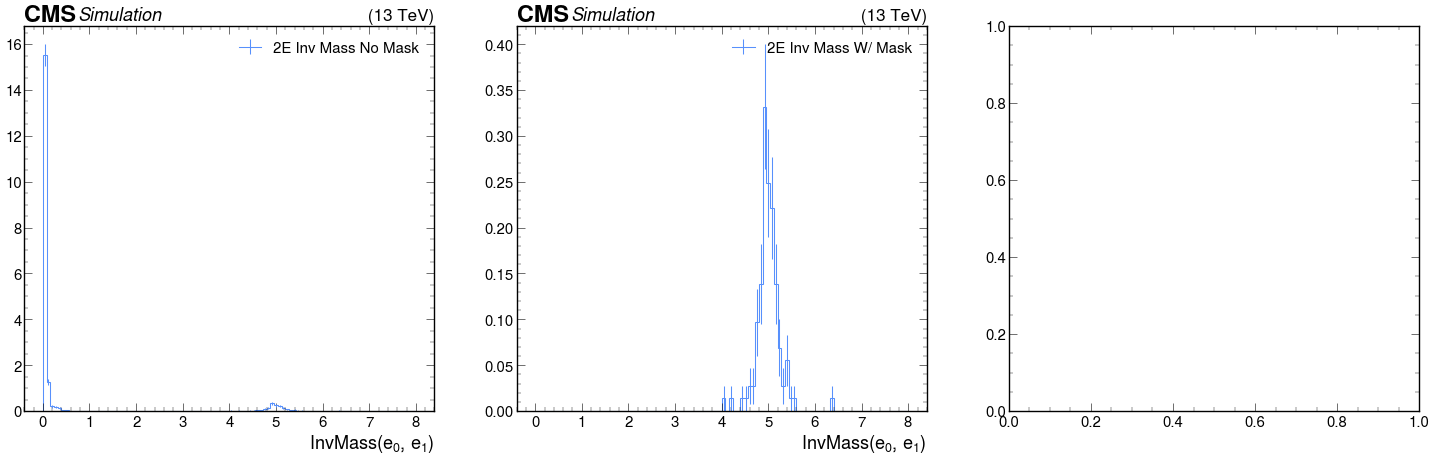

In [7]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
utilities.plot(out[samples[0]]["hists"]["jake_test_no_mask"][channels[1], :], density=False, label="2E Inv Mass No Mask");
plt.legend();

plt.subplot(1,3,2)
utilities.plot(out[samples[0]]["hists"]["jake_test"][channels[1], :], density=False, label="2E Inv Mass W/ Mask");
plt.legend();